In [3]:
import matplotlib.pyplot as plt
import torch.nn as nn

from probability import *
from information import *

In [4]:
%reload_ext autoreload

%autoreload 2

In [5]:
net = CNN()
train_data = datasets.MNIST(
    root = 'data',
    train = True,
    transform = ToTensor(),
    download = True,
)

test_data = datasets.MNIST(
    root='data',
    train=False,
    transform=ToTensor()
)

mnist_train = torch.utils.data.DataLoader(train_data,
                                          batch_size=100,
                                          shuffle=True,
                                          num_workers=1)

mnist_test = torch.utils.data.DataLoader(test_data,
                                         batch_size=100,
                                         shuffle=True,
                                         num_workers=1)

total_step = len(mnist_train)


In [6]:
# рассмотрим первый батч
for i, (images, labels) in enumerate(mnist_train):
    z1, z2, z3 = net.forwards_output(images)
    break

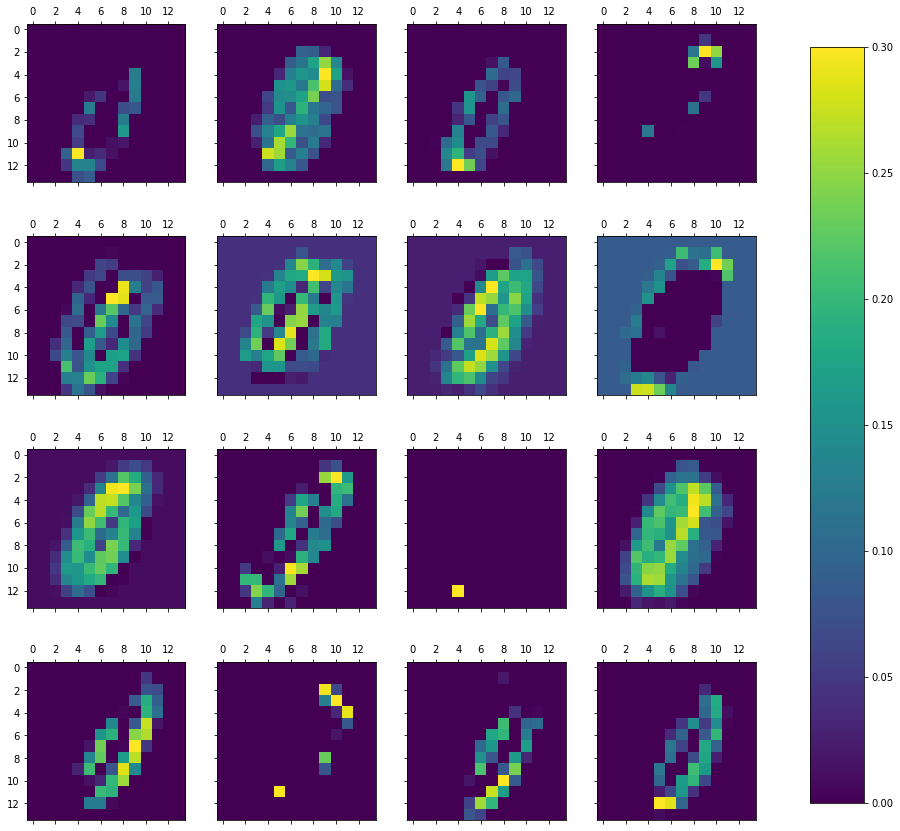

In [7]:
fig, axs = plt.subplots(4, 4, figsize=(15, 15), sharey=True)

for i in range(16):
    x = i // 4
    y = i % 4
    im = axs[x][y].matshow(z1[0][i].detach().numpy())

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)

plt.show()

(3, 144)


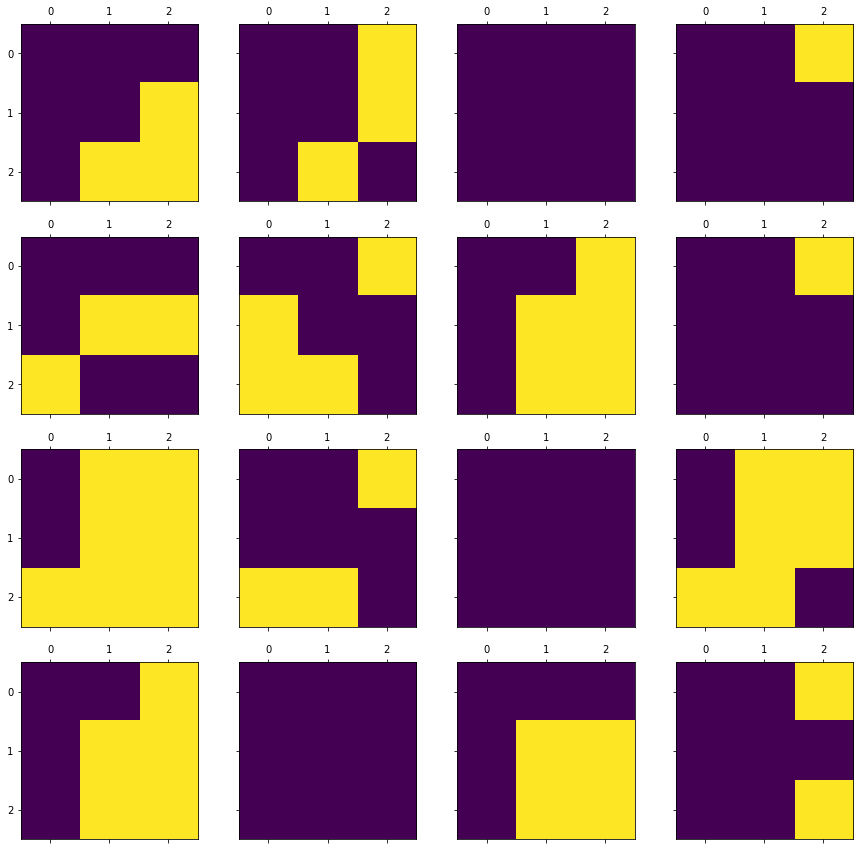

In [8]:
def discrete(hidden, num_count):
    hidden_numpy = hidden.detach().numpy()
    hidden_view = hidden_numpy.reshape(hidden_numpy.shape[0], -1)
    hidden_mins = np.quantile(hidden_view, 0.01, axis=0) - 0.1
    hidden_maxs = np.quantile(hidden_view, 0.99, axis=0) + 0.1
    
    if num_count == 2:
        hidden_maxs /= 2
            
    bins = np.linspace(hidden_mins, hidden_maxs, num=num_count)
    print(bins.shape)
    indexes = np.zeros((hidden_view.shape[0], hidden_view.shape[1]))
    for i in range(hidden_view.shape[1]):
        indexes[:, i] = np.digitize(hidden_view[:, i], bins[:, i])
    indexes = indexes.reshape(hidden.shape)
    bins_mins = bins[0].reshape(hidden.shape[1:])
    bins_maxs = bins[1].reshape(hidden.shape[1:])
    return indexes, bins_mins, bins_maxs

avg_4 = nn.MaxPool2d(4)
    
disc_z1, bins_z1_min, bins_z1_max  = discrete(avg_4(z1), 3)
fig, axs = plt.subplots(4, 4, figsize=(15, 15), sharey=True)

for i in range(16):
    x = i // 4
    y = i % 4
    im = axs[x][y].matshow(disc_z1[0][i])

#fig.subplots_adjust(right=0.8)
#cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
#fig.colorbar(im, cax=cbar_ax)

plt.show()

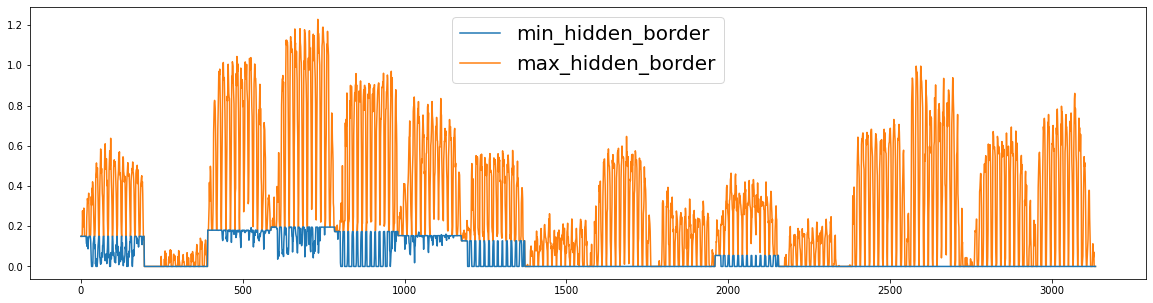

In [65]:
# get boards of features
z1_numpy = z1.detach().numpy()
z1_reshape = z1_numpy.reshape(z1_numpy.shape[0], -1)
hidden_mins = np.quantile(z1_reshape, 0.01, axis=0)
hidden_maxs = np.quantile(z1_reshape, 0.99, axis=0)

plt.figure(figsize=(20, 5))
plt.plot(hidden_mins, label='min_hidden_border', zorder=10)
plt.plot(hidden_maxs, label='max_hidden_border', zorder=1)

plt.legend(prop={'size': 20})
plt.show()

In [52]:
means = np.mean(z1_reshape, axis=0)
std = np.std(z1_reshape, axis=0)

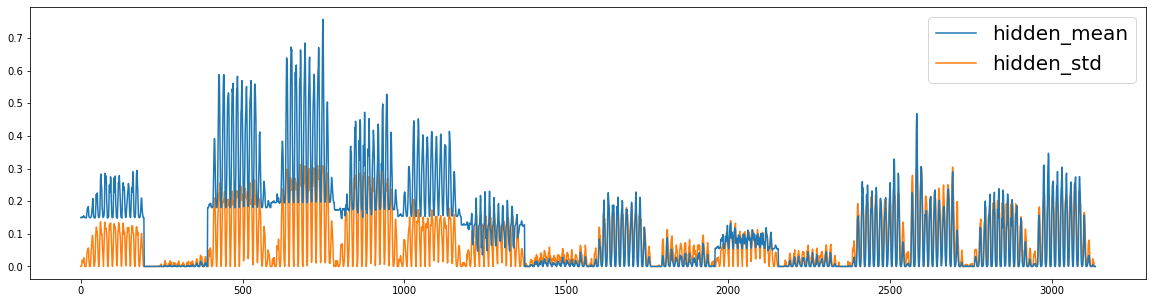

In [66]:
plt.figure(figsize=(20, 5))
plt.plot(means, label='hidden_mean', zorder=10)
plt.plot(std, label='hidden_std', zorder=1)

plt.legend(prop={'size': 20})
plt.show()